In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 1. Data Preparation

# About the Dataset

## Importing dataset

In [163]:
dataset_url = 'dataset/churn_dataset.csv'
df = pd.read_csv(dataset_url)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2. Dataset Description

In [125]:
df.shape

(10000, 14)

In [126]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

This dataset consists of both numerical and categorical data with 10,000 rows and 14 attributes, as given below:
a)	RowNumber: Index for the records

b)	CustomerId: Unique identifier for each customer

c)	Surname: Customer's last name

d)	CreditScore: Customer's credit score

e)	Geography: Customer's location (France, Germany, or Spain)

f)	Gender: Customer's gender (Male or Female)

g)	Age: Customer's age

h)	Tenure: Number of years the customer has been with the bank

i)	Balance: Customer's account balance

j)	NumOfProducts: Number of bank products the customer is using.

k)	HasCrCard: Whether the customer has a credit card (1) or not (0)

l)	IsActiveMember: Whether the customer is an active member (1) or not (0)

m)	EstimatedSalary: Estimated salary of the customer

n)	Exited: Whether the customer has left the bank (1) or not (0)


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [128]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 3. Missing values handling

In [129]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Here, this dataset does not have any missing values

# 4. Exploratory Data Analysis

In [130]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [131]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [132]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [133]:
df['Exited'].value_counts(normalize=True) * 100

0    79.63
1    20.37
Name: Exited, dtype: float64

In [134]:
df[df['HasCrCard']==1]['Gender'].value_counts()


Male      3863
Female    3192
Name: Gender, dtype: int64

Here, Among 10000 customers, 5457 are male and 4543 are female. 7055 customers has credit card and 2945 don't have credit card. (2037)20.37% of customers have churned and 7963(79.63% of customers are retained.)  

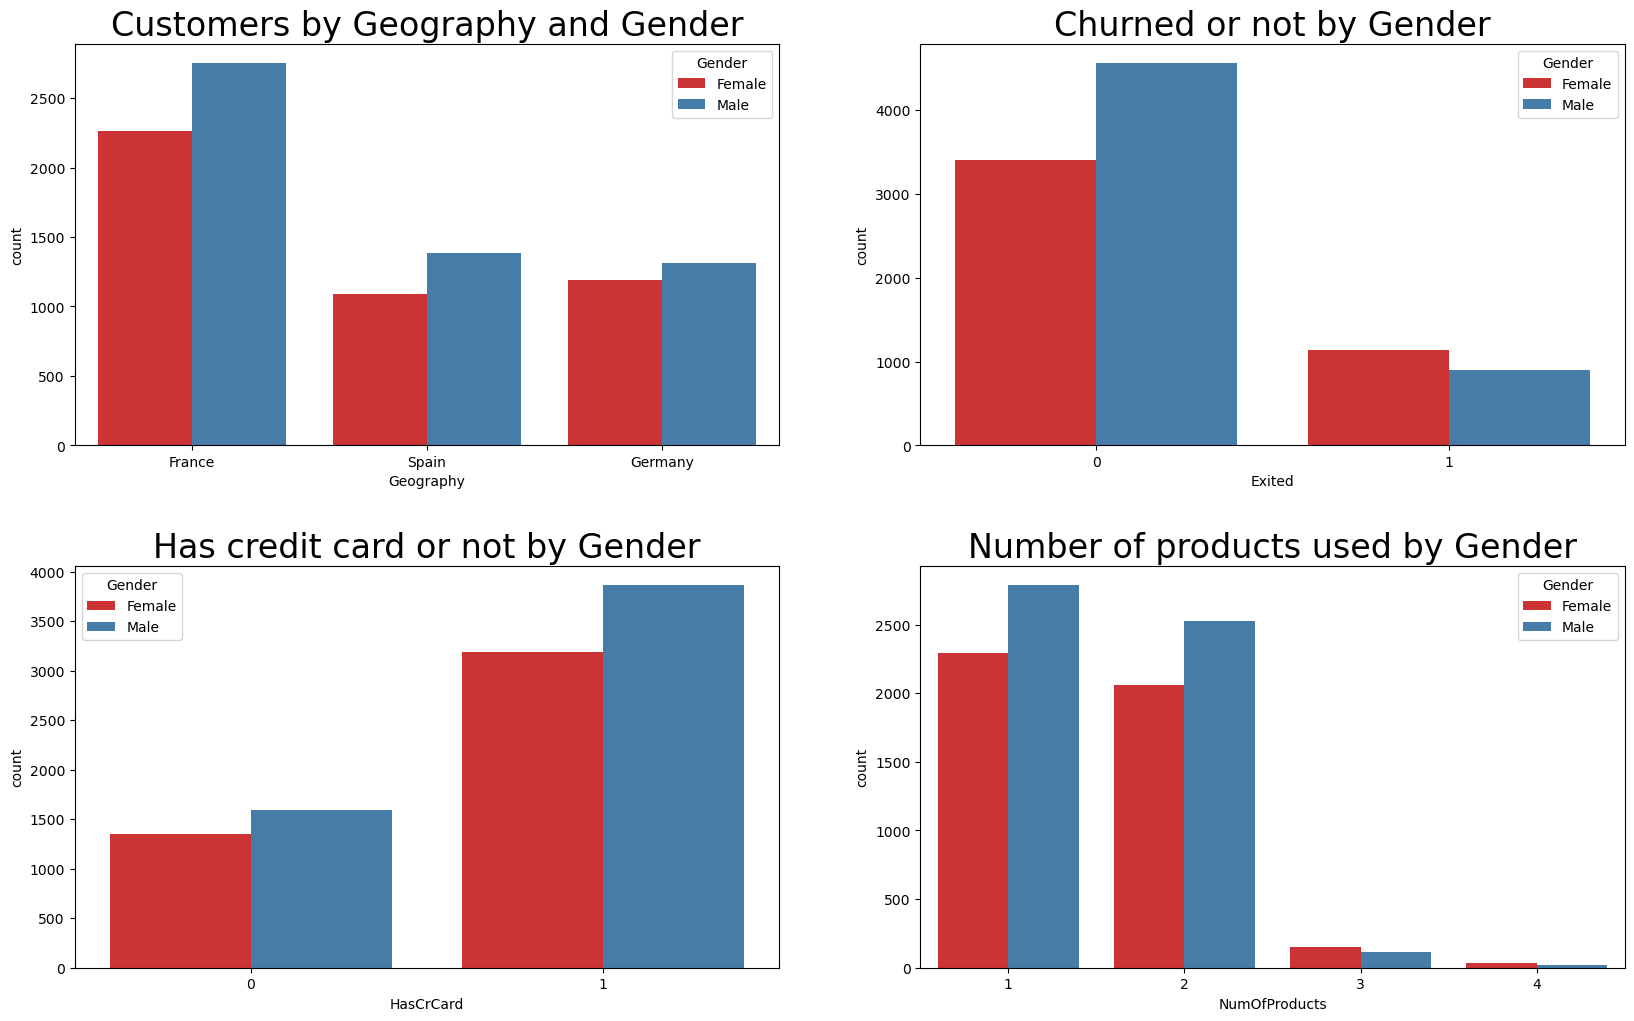

In [136]:
fig,axs = plt.subplots(2,2,figsize=(20,12))
sns.set_palette('Set1')
axs[0][0].set_title('Customers by Geography and Gender',fontsize=24)
sns.countplot(x = 'Geography', hue='Gender', data=df, ax = axs[0][0])
axs[0][1].set_title('Churned or not by Gender',fontsize=24)
sns.countplot(x = 'Exited', hue='Gender', data=df, ax = axs[0][1])
axs[1][0].set_title('Has credit card or not by Gender',fontsize=24)
sns.countplot(x = 'HasCrCard', hue='Gender', data=df, ax = axs[1][0])
axs[1][1].set_title('Number of products used by Gender',fontsize=24)
sns.countplot(x = 'NumOfProducts', hue='Gender', data=df, ax = axs[1][1])
plt.subplots_adjust(wspace=0.2, hspace=0.3)

From the above graph, we can see that most of the customers are from France. Among the 3 countries, all of them
have higher proportion of male customers in comparison. 
Among two genders, female customer churning is greater

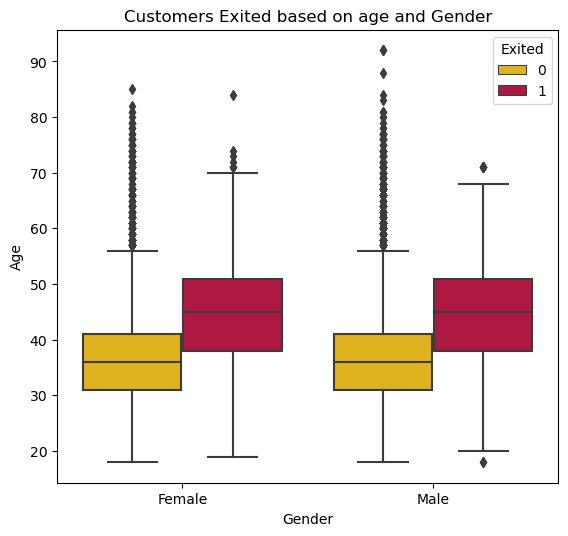

In [137]:
fig = plt.figure(figsize = (22,20))
ax = fig.add_subplot(3,3,1)

my_palette = ["#FFC300", "#C70039"]
g = sns.boxplot(x = "Gender",
                y = "Age", 
                hue = "Exited",
                data = df,
                palette = my_palette,
                ax = ax)

g.set_title("Customers Exited based on age and Gender")
plt.show()

From above graph, we can say that the customers that are churned for both gender belongs to almost same age group.
i.e 38-52 years

In [138]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [139]:
df[df["Gender"]=="Female"][["Geography", "Exited"]].value_counts()

Geography  Exited
France     0         1801
Spain      0          858
Germany    0          745
France     1          460
Germany    1          448
Spain      1          231
dtype: int64

In [140]:
df[df["Gender"]=="Male"][["Geography", "Exited"]].value_counts()

Geography  Exited
France     0         2403
Spain      0         1206
Germany    0          950
           1          366
France     1          350
Spain      1          182
dtype: int64

In [141]:
import plotly.graph_objects as go

# Create two separate dataframes for male and female customers
male_df = df[df["Gender"]=="Male"][["Geography", "Exited"]].value_counts().reset_index(name='count')
female_df = df[df["Gender"]=="Female"][["Geography", "Exited"]].value_counts().reset_index(name='count')

# Create two separate bar traces for male and female customers
male_trace = go.Bar(x=male_df['Geography'], y=male_df['count'], name='Male', text=male_df['count'], hovertemplate="Geography: %{x}<br>Exited: %{text}")
female_trace = go.Bar(x=female_df['Geography'], y=female_df['count'], name='Female', text=female_df['count'], hovertemplate="Geography: %{x}<br>Exited: %{text}")

# Create a figure object and add the two traces
fig = go.Figure(data=[male_trace, female_trace])

# Update the layout of the figure
fig.update_layout(title='Exited Customers by Geography and Gender',
                  xaxis_title='Geography',
                  yaxis_title='Count',
                  barmode='group',
                  hovermode='x')

# Show the figure
fig.show()

We can clearly see that, although there are majority of customers from france, but the exited customers are higher in Germany.

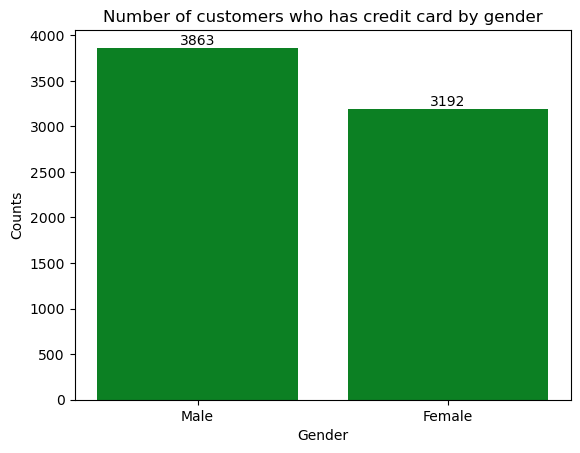

In [160]:
hascard = df[df['HasCrCard']==1]['Gender'].value_counts()
fig, ax = plt.subplots()
bars = ax.bar(hascard.index,hascard.values,color='#0C8023')
ax.bar_label(bars,labels=hascard.values,label_type='edge')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Number of customers who has credit card by gender')
plt.show()

In [183]:
# Create two separate pie plots for exited and non-exited customers
exited_df = df[df["Exited"]==1][["NumOfProducts"]].value_counts().reset_index(name='count')
not_exited_df = df[df["Exited"]==0][["NumOfProducts"]].value_counts().reset_index(name='count')

# Create two separate pie traces for exited and non-exited customers
exited_trace = go.Pie(labels=exited_df['NumOfProducts'], values=exited_df['count'], name='Exited', hole=0.5, domain={'x': [0, 0.45]}, hoverinfo='label+percent')
not_exited_trace = go.Pie(labels=not_exited_df['NumOfProducts'], values=not_exited_df['count'], name='Not Exited', hole=0.5, domain={'x': [0.55, 1]}, hoverinfo='label+percent')

# Create a figure object and add the two traces
fig = go.Figure(data=[exited_trace, not_exited_trace])

# Update the layout of the figure
fig.update_layout(title={'text': 'Exited vs. Not Exited Customers by Number of Products', 'x':0.5, 'y':0.95, 'xanchor': 'center', 'yanchor': 'top'},
                  annotations=[dict(text='Exited', x=0.17, y=0.5, font_size=15, showarrow=False),
                               dict(text='Not Exited', x=0.86, y=0.5, font_size=15, showarrow=False)],
                  height=500, width=800)

# Show the figure
fig.show()


Here, the above pie plot depicts that among customers who churn, the percentage of those who use only one product is quite high at 69.2%, followed by those who use two at 17.1%, three at 10.8%, and four at 2.95%. Customers with two items make up 53.3% of non-churn customers, those with one product are 46.2%.

In [188]:
churn     = df[df["Exited"] == 1]
not_churn = df[df["Exited"] == 0]

In [199]:
import plotly.graph_objs as go
import plotly.offline as py

def plot_histogram(column, data):
    exited = data[data.Exited == 1]
    not_exited = data[data.Exited == 0]
    
    trace1 = go.Histogram(x=exited[column],
                          histnorm="percent",
                          name="Exited",
                          marker=dict(line=dict(width=0.5,
                                                color="black")),
                          opacity=0.9) 
    
    trace2 = go.Histogram(x=not_exited[column],
                          histnorm="percent",
                          name="Not Exited",
                          marker=dict(line=dict(width=0.5,
                                                color="black")),
                          opacity=0.9)
    
    data = [trace1, trace2]
    layout = go.Layout(dict(title=column + " Distribution in Exited Customers",
                            plot_bgcolor="rgb(243,243,243)",
                            paper_bgcolor="rgb(243,243,243)",
                            xaxis=dict(gridcolor="rgb(255, 255, 255)",
                                       title=column,
                                       zerolinewidth=1,
                                       ticklen=5,
                                       gridwidth=2),
                            yaxis=dict(gridcolor="rgb(255, 255, 255)",
                                       title="Percent",
                                       zerolinewidth=1,
                                       ticklen=5,
                                       gridwidth=2)))
    fig = go.Figure(data=data, layout=layout)
    
    py.iplot(fig)

plot_histogram('CreditScore', df)

In [197]:
plot_histogram('Age', df)

In [144]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Here, we can see that the surname column has 2932 unique values which means that the customers do belong to the same family group.
Although it seems unique but actually we dont need this column. Removing 3 columns RowNumber, CustomerId and Surname as they are
not that relevant to our analysis.


In [145]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [146]:
df.shape

(10000, 11)

In [147]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Here, we can see that columns such as 'NumOfProducts','HasCrCard','IsActiveMember', and 'Exited' looks like numerical but actually these are categorical variables.
So, changing it to categorical variables.

In [148]:
df[['NumOfProducts','HasCrCard','IsActiveMember','Exited']]= df[['NumOfProducts','HasCrCard','IsActiveMember','Exited']].astype('object')

In [149]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts       object
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
dtype: object

## Statistical Analysis

In [150]:
df.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


Among all the columns, there are only 5 numerical columns. From the above statistical analysis, here are the conclusions that we can draw.
Mean Age of customers is 38 years, Maximum Age is 92 years and Minimum Age is 18 years old.
Mean Estimated Salary 100090 and the minimum is 11 and maximum is 199992.
Mean Balance is 76485, standard deviation is so high, so we can say that this column is highly distributed across the dataset.

### Pair plot for numerical columns

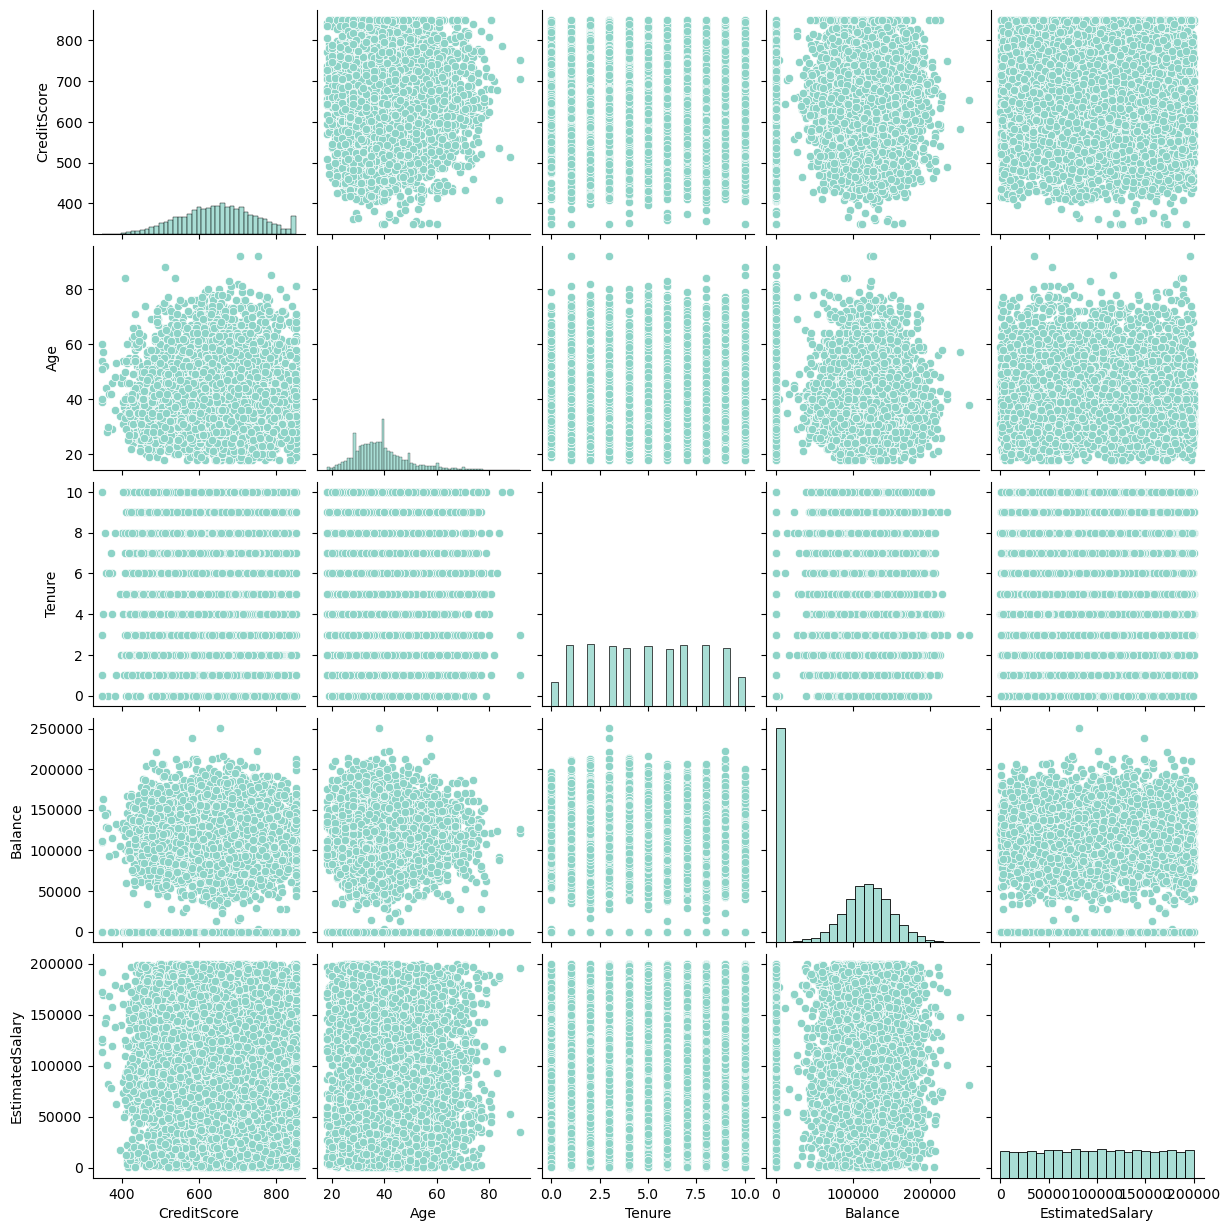

In [151]:
df_numerical = df.select_dtypes(include=np.number)
sns.pairplot(df_numerical)